In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import chart_studio.plotly as py
import plotly.express as px


PANDAS DATETIME INDEX

In [42]:
pd.date_range('Oct 20, 2023', periods=20, freq='D')
pd.to_datetime(['10-02-2023', '10-04-2023'], format='%m-%d-%Y')

arr_1 = np.random.randint(10, 50, size=(3, 4))
date_arr = pd.date_range('2020-04-25', periods=3, freq='M')
df = pd.DataFrame(arr_1, index=date_arr, columns=['A', 'B', 'C', 'D'])
df.index.min()


Timestamp('2020-04-30 00:00:00')

TIME RESAMPLING

<Axes: xlabel='AAPL_x'>

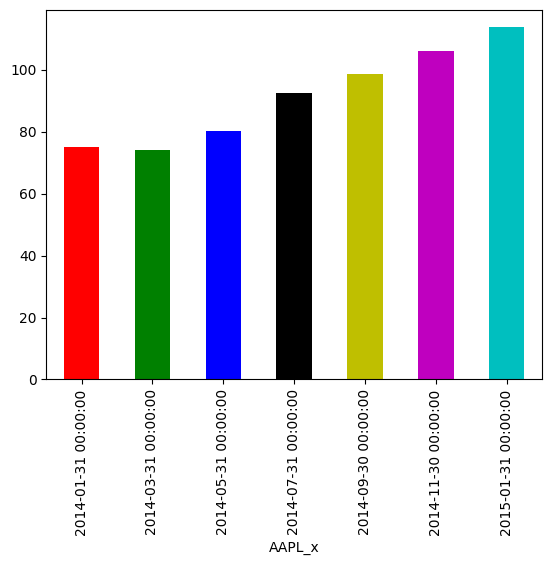

In [43]:

# Import stock data from a CSV file
df_appl = pd.read_csv('appl.csv')
# Print a chart
px.line(df_appl, x='AAPL_x', y='AAPL_y', 
        labels={'x':'Date', 'y':'Price'})
df_appl.head()

# We can set the date as an index and treat as a date rather
# than a string
df_appl = pd.read_csv('appl.csv', index_col='AAPL_x', 
                     parse_dates=True)
df_appl

# Generate a random 240 item array for volume data
arr_2 = np.random.randint(86000000, 256000000, size=240)
# Add volume data to dataframe
df_appl['Volume'] = arr_2
# Rename column AAPL_y Price
df_appl.rename(columns={'AAPL_y':'Price'}, inplace = True)
df_appl

# Get the average price and volume over the year 'A'
# Try min, max, sum, std
df_appl.resample(rule='A').mean()

# Get standard deviation just on the price
df_appl['Price'].resample('A').std()

# Get weekly, monthly, biweekly, quarterly mean
# Also D (Day), H (Hour), T (Minute), S (Second), L (Millisecond)
# U (Microsecond)
df_appl['Price'].resample(rule='W').mean()
df_appl['Price'].resample(rule='M').mean()
df_appl['Price'].resample(rule='SM').mean()
df_appl['Price'].resample(rule='Q').mean()
# Bimonthly plus a bar plot with a list of colors
df_appl['Price'].resample(rule='2M').mean().plot.bar(color=list('rgbkymc')) 

MOVING AVERAGE

<Axes: xlabel='AAPL_x'>

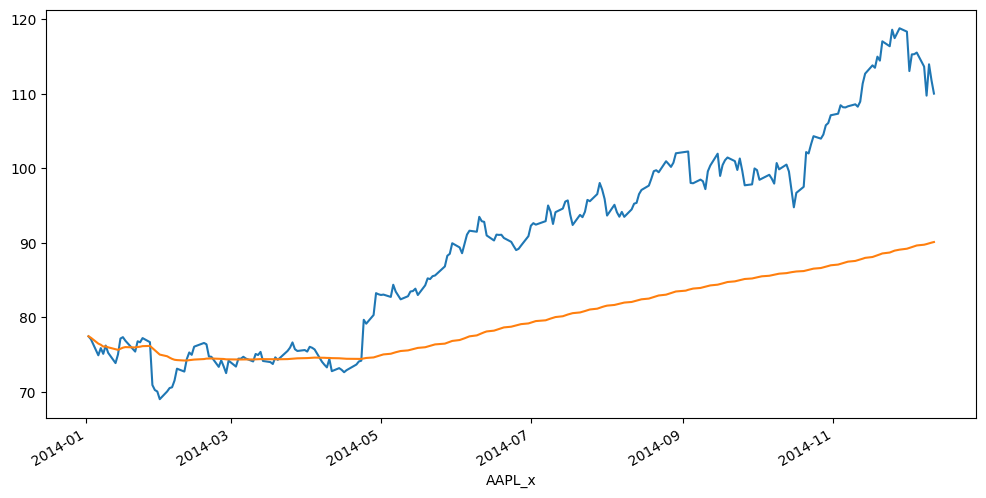

In [44]:
df_appl['Price'].plot(figsize=(12,6))

# Use weekly data to create a rolling average
# df_appl.rolling(window=7).mean()['Price'].plot()

# Use monthly data to create a rolling average
# df_appl.rolling(window=30).mean()['Price'].plot()

# Show average of everything that came before it
df_appl['Price'].expanding().mean().plot(figsize=(12,6))

SHIFTING TIME DATA

In [45]:
# Shift data down 1 row
# df_appl = df_appl.shift(1) to make permanent
df_appl.shift(1)
# Shift data up 1 row
df_appl.shift(-1)

,Price,Volume
AAPL_x,,
2014-01-02,77.045575,234736257.0
2014-01-03,74.896972,140570663.0
2014-01-06,75.856461,197480270.0
2014-01-07,75.091947,158866774.0
2014-01-08,76.202632,175133290.0
...,...,...
2014-12-08,109.755497,224909794.0
2014-12-09,113.960331,102032692.0
2014-12-10,111.817477,112760914.0
